In [1]:
from matplotlib import pyplot as plt
import seaborn  as sns
from matplotlib import font_manager, rc


font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import numpy as np
from sklearn.preprocessing import RobustScaler


# # 1. 데이터 전처리

### # 1. 서울시 자치구별 5대 범죄 발생 건수

In [2]:
crime_2018 = pd.read_table('./data/seoul_crime/crime_18.txt', header=1, sep='\t',  thousands=',')


In [3]:
col = ['기간','자치구', '합계발생', '합계검거', '살인발생', '살인검거', '강도발생', '강도검거', '강간강제추행발생',
       '강간강제추행검거', '절도발생', '절도검거', '폭력발생', '폭력검거']

crime_2018.columns = col 

crime_2018.drop(['합계검거', '살인검거', '강도검거', '강간강제추행검거','절도검거','폭력검거'], 
                 axis=1, inplace=True)

crime_2018.set_index('자치구', inplace=True)



In [4]:
crime_test1 = pd.pivot_table(crime_2018,index=['자치구'], values='합계발생', aggfunc=[sum])

crime_test1 = crime_2018.sort_values(('합계발생'), ascending= False)


In [5]:
crime_test1.drop(['기간','살인발생', '강도발생', '강간강제추행발생','절도발생','폭력발생'], 
                 axis=1, inplace=True)

### # 2. 서울시 자치구별 유동인구 수

In [6]:
pop_2018 = pd.DataFrame({'자치구':['강서구', '강동구', '강남구', '성북구', '중구', '은평구', '금천구', '광진구', '서대문구', '중랑구',
                     '강북구', '관악구', '구로구', '영등포구', '마포구', '종로구', '도봉구', '용산구',
                     '동작구', '서초구', '송파구', '노원구', '성동구', '양천구', '동대문구'], 

              '총유동인구' : [2420000, 1470000, 4400000, 1510000, 2040000, 1310000,1100000,1700000,1260000,1320000,
                        896009,1560000,1870000,2780000, 2310000,1790000, 937167,2070000,
                        1710000, 4010000,3290000,1720000,1740000, 1500000,1350000]
             
             })
pop_2018.head()

,자치구,총유동인구
0,강서구,2420000
1,강동구,1470000
2,강남구,4400000
3,성북구,1510000
4,중구,2040000


### # 3. merge

In [7]:
result= pd.merge(crime_test1, pop_2018, on='자치구')

result.set_index('자치구', inplace=True)
result.sort_values(by='총유동인구', ascending=False, inplace=True)

# # 2. 상관관계 

### # 1. 상관계수 

In [8]:
crime_pop_corr = result.corr(method='pearson')
crime_pop_corr

,합계발생,총유동인구
합계발생,1.000000,0.788815
총유동인구,0.788815,1.000000



##### 서울시 자치구별 유동인구 수와 5대 범죄 발생 수는 높은 상관관계를 보인다


### # 2. 시각화

In [9]:
tmp = result.reset_index().rename(columns={"index": "자치구"})

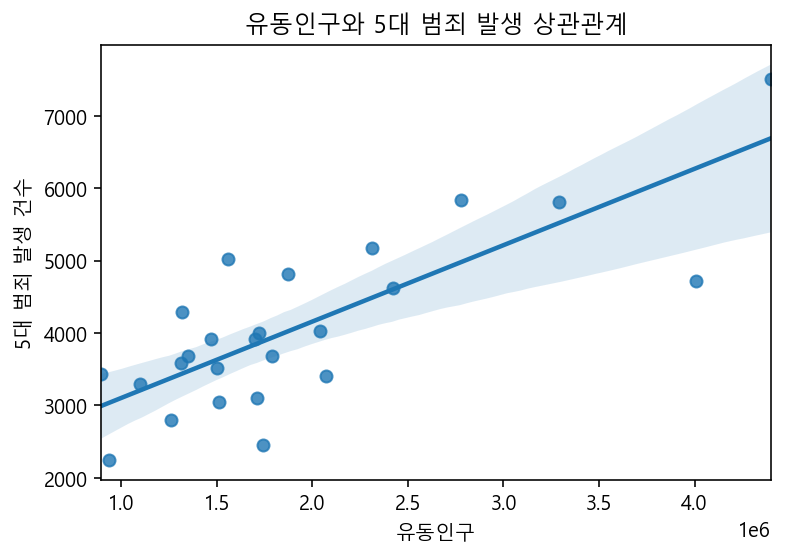

In [10]:
graph = sns.regplot(x=tmp["총유동인구"], y=tmp["합계발생"])
graph.set_xlabel('유동인구')
graph.set_ylabel("5대 범죄 발생 건수")
graph.set_title('유동인구와 5대 범죄 발생 상관관계')
plt.show()
